<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET OF DATA SCIENCE</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Bank Customer Churn
</h2>
</div>

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; "> Importation of librairies and loading data and FE

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation of librairies</h3>
</div>

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functions import plot_boxplots, plot_active_member_distribution, plot_country_distribution, balance_age, select_features_and_target
from functions import get_numerics_col, train_val_test_split, scale_numeric_data, encode_categorical_data, get_categorical_col
from imblearn.combine import SMOTEENN


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Importation of Data</h3>
</div>

In [2]:
data = pd.read_csv('../data/BCC.csv', sep=',')

In [3]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Describing of the Data

* customer_id: Unique identifier for each customer.
* credit_score: Numerical assessment of creditworthiness.
* country: Country of residence or operation.
* gender: Gender of the customer.
* age: Age of the customer.
* tenure: Length of time as a customer.
* balance: Amount of money in the customer's account.
* products_number: Number of financial products/services the customer has.
* credit_card: Binary indicator for whether the customer has a credit card.
* active_member: Binary indicator for active membership status.
* estimated_salary: Estimated salary or income of the customer.
* churn: Binary indicator for customer churn (account closure or service discontinuation).

In [4]:
def my_exploration(data):
    display(data.describe())

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


* There is no nan values

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; "> First insights of the data

In [6]:
# first insights about data
print('Total number of clients is:', data['customer_id'].nunique(), 'clients')
print('number of churn clients is :', data.loc[data['churn'] == 1]['churn'].count(), 'clients' )
print('number of non churn clients is :', data.loc[data['churn'] == 0]['churn'].count(), 'clients' )
churn = data.loc[data['churn'] == 1]['churn'].count()
nonchurn = data.loc[data['churn'] == 0]['churn'].count()
print('the percentige of churn clients is:', (churn * 100) / len(data.churn), '%')
print('the percentige of non-churn clients is:', (nonchurn * 100) / len(data.churn), '%')
print('Total number of products is:', data['products_number'].nunique(), 'products')
print('number of clients have cards is :', data.loc[data['credit_card'] == 1]['credit_card'].count(), 'cards' )
print('number of clients have cards is :', data.loc[data['credit_card'] == 0]['credit_card'].count(), 'cards' )
withcc = data.loc[data['credit_card'] == 1]['credit_card'].count()
withoutcc = data.loc[data['credit_card'] == 0]['credit_card'].count()
print('the percentige of clients  have credit card is:', (withcc * 100) / len(data.credit_card), '%')
print('the percentige of clients not have credit card is:', (withoutcc * 100) / len(data.credit_card), '%')

print('number of active_member is :', data.loc[data['active_member'] == 1]['active_member'].count(), 'active_members' )
print('number of inctive_member is :', data.loc[data['active_member'] == 0]['active_member'].count(), 'active_members' )
print('our clients from:', data['country'].unique())
print('the sex of our clients is :', data.loc[data['gender'] == 'Male']['gender'].count(), 'Male' )
print('the sex of our clients is :', data.loc[data['gender'] == 'Female']['gender'].count(), 'Female' )
male = data.loc[data['gender'] == 'Male']['gender'].count()
female =  data.loc[data['gender'] == 'Female']['gender'].count()
print('the percentige of male clients is:', (male * 100) / len(data.gender), '%')
print('the percentige of female clients is:', (female * 100) / len(data.gender), '%')

Total number of clients is: 10000 clients
number of churn clients is : 2037 clients
number of non churn clients is : 7963 clients
the percentige of churn clients is: 20.37 %
the percentige of non-churn clients is: 79.63 %
Total number of products is: 4 products
number of clients have cards is : 7055 cards
number of clients have cards is : 2945 cards
the percentige of clients  have credit card is: 70.55 %
the percentige of clients not have credit card is: 29.45 %
number of active_member is : 5151 active_members
number of inctive_member is : 4849 active_members
our clients from: ['France' 'Spain' 'Germany']
the sex of our clients is : 5457 Male
the sex of our clients is : 4543 Female
the percentige of male clients is: 54.57 %
the percentige of female clients is: 45.43 %


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; "> Visualisations

In [7]:
data.tail()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


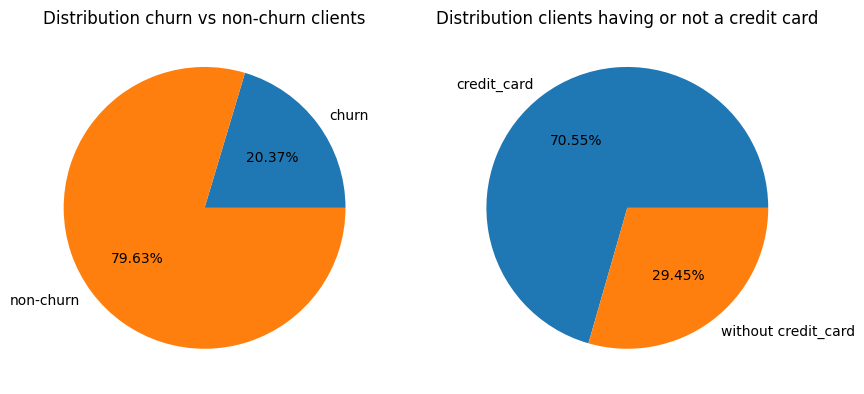

In [8]:
# pie chart describe Distribution churn vs non-churn clients
values_churn = [churn, nonchurn]
labels_churn = ["churn", "non-churn"]
values_card = [withcc, withoutcc]
labels_card = ["credit_card", "without credit_card"]

fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Plot the first pie chart
axs[0].pie(x=values_churn, labels=labels_churn, autopct='%.2f%%')
axs[0].set_title("Distribution churn vs non-churn clients")

# Plot the second pie chart
axs[1].pie(x=values_card, labels=labels_card, autopct='%.2f%%')
axs[1].set_title("Distribution clients having or not a credit card")
plt.show()

* 70.55 % of clients have credit card, 20.37 % of clients are churn 

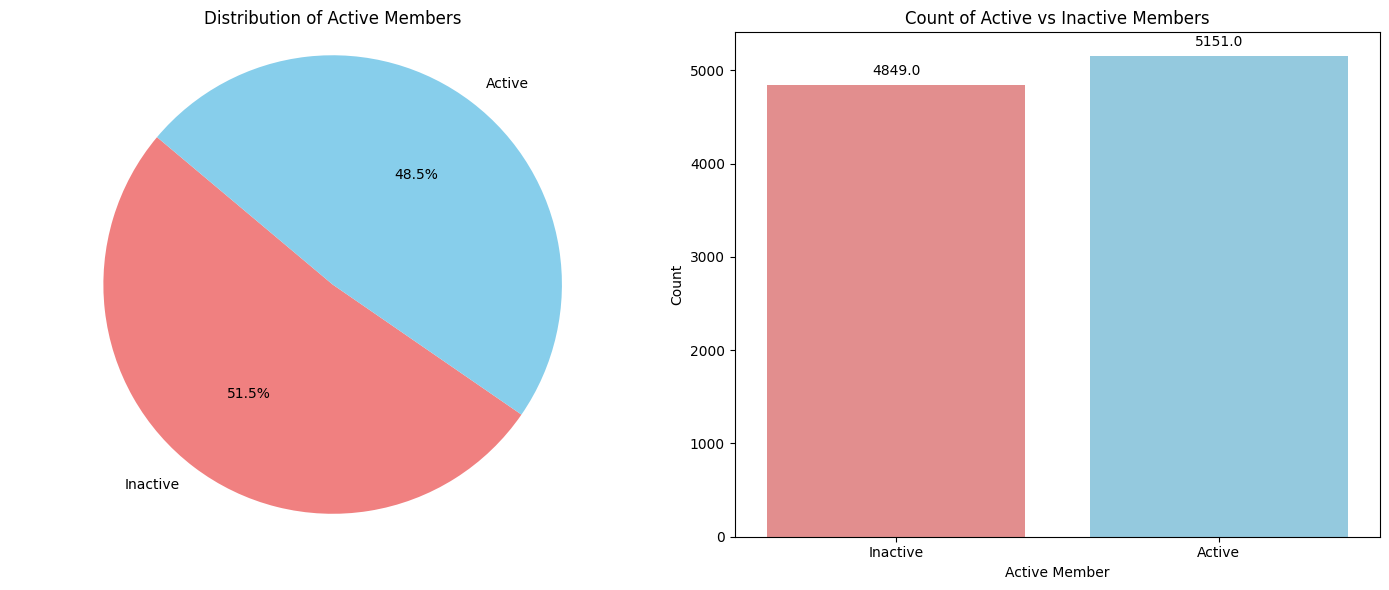

In [9]:
plot_active_member_distribution(data)

* number of active_member is : 5151 active_members  
* number of inctive_member is : 4849 active_members
* Some customers might be using the bank's services less frequently but are still maintaining their accounts, leading to a high number of inactive members

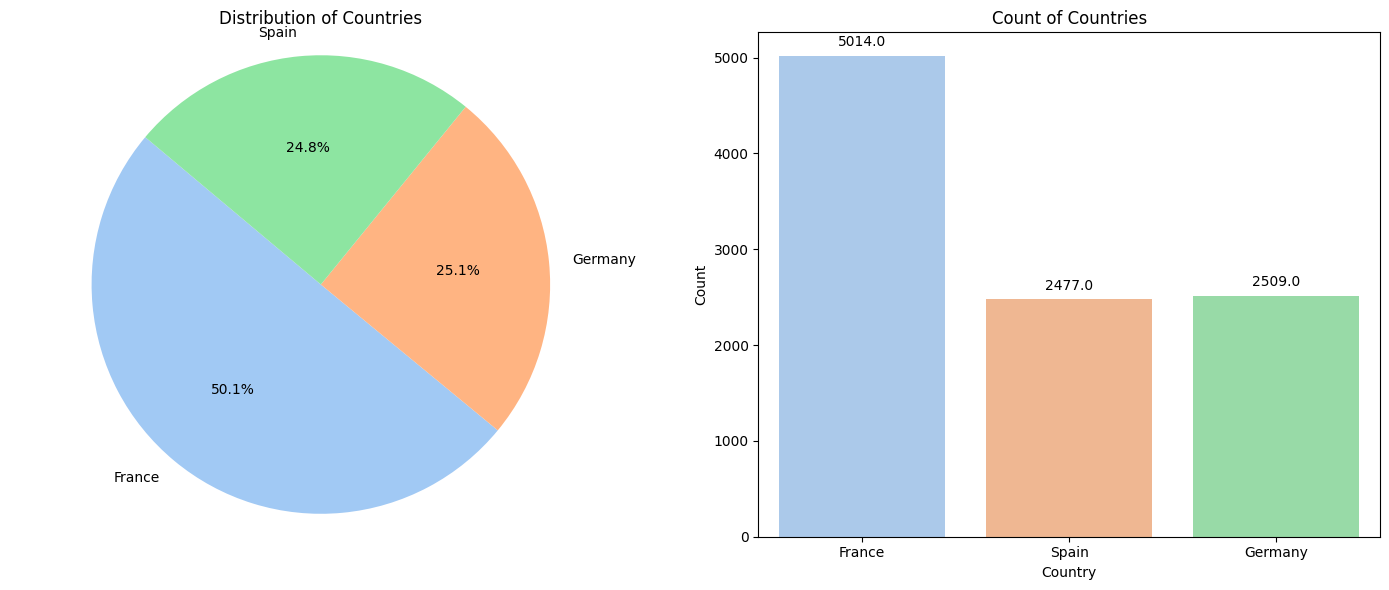

In [10]:
plot_country_distribution(data)

* half of clients from france, 25.1 % from germany, 24.8 % from spain
* i suggest to target clients from neighboring countires like belguim, Switzerland, uk... to get more clients speacially the half of the clients they speak french and knows french banking systems also Geographical proximity can facilitate easier market penetration and operational

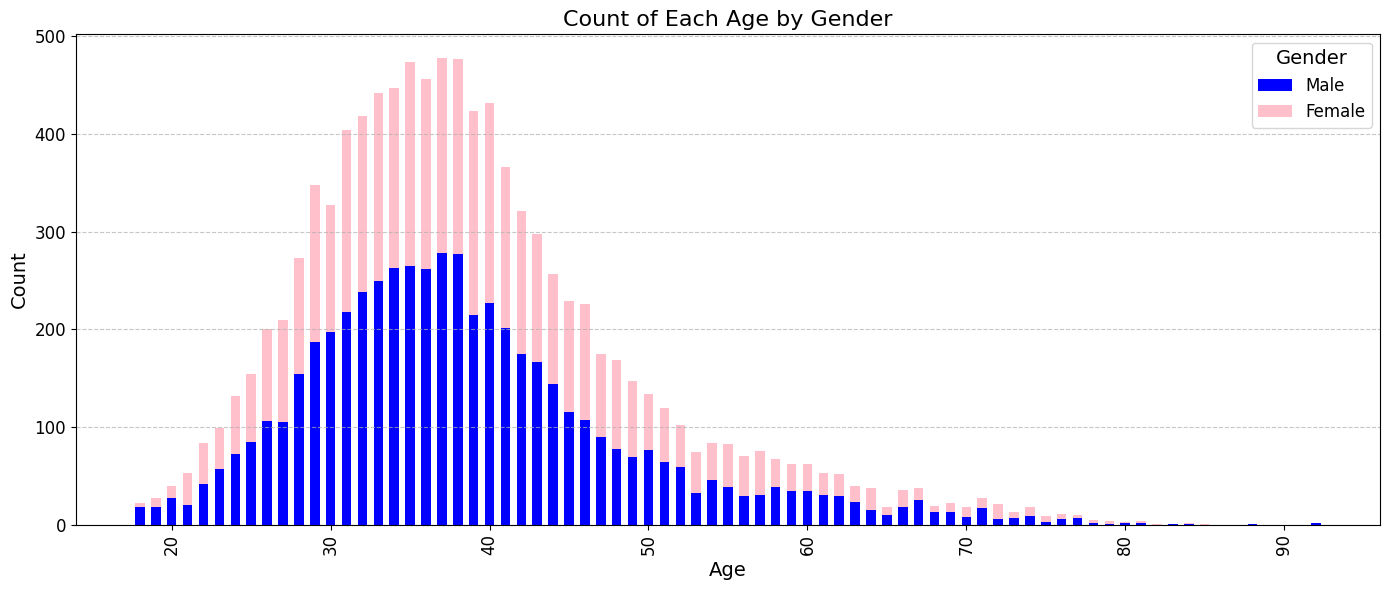

In [11]:

age_gender_counts = data.groupby(['age', 'gender']).size().unstack().fillna(0)
plt.figure(figsize=(14, 6))
# Plotting with stacked bars to represent counts of each gender
plt.bar(age_gender_counts.index, age_gender_counts['Male'], color='blue', label='Male', width=0.6)
plt.bar(age_gender_counts.index, age_gender_counts['Female'], bottom=age_gender_counts['Male'], color='pink', label='Female', width=0.6)

plt.title('Count of Each Age by Gender', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Gender', fontsize=12, title_fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [12]:
mean_age_female = data.loc[data['gender']== "Female"]['age'].mean()
mean_age_male = data.loc[data['gender']== "Male"]['age'].mean()

mean_age_female, mean_age_male

(39.238388729914156, 38.658237126626354)

* the range of age of the clients is [18;92]
* most of the client between [25; 50] 
* mean age of female is 39.2 and for male is 38.6
* distribution of age are quit balanced bewteen male and female
* Customer Age is almost Normally disturbuted, with some outlier on higher end.

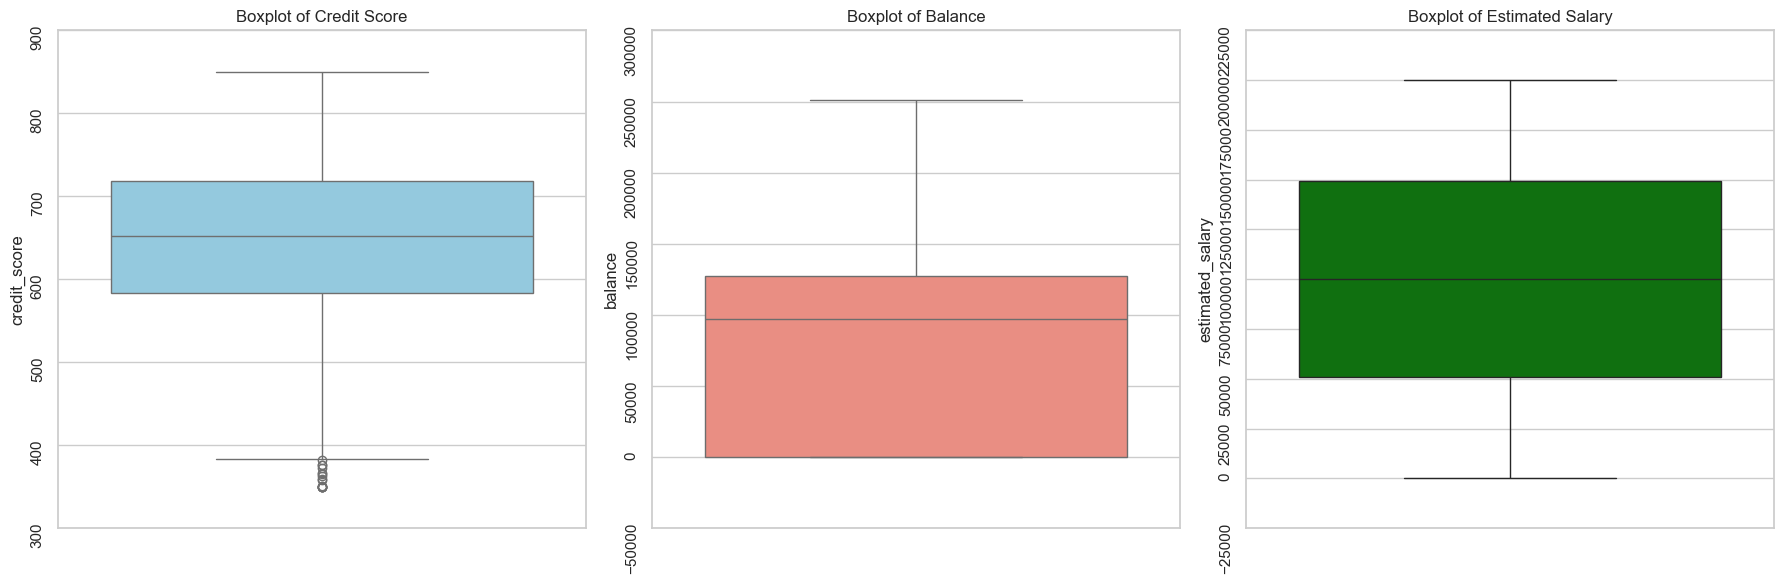

In [13]:
plot_boxplots(data)

* with credit scores having some lower outliers, while balances and estimated salaries are evenly distributed without outliers.

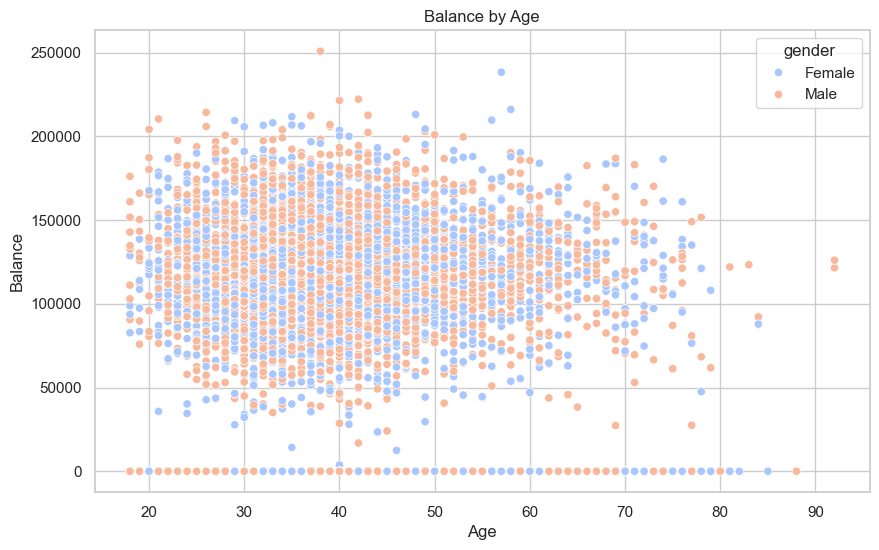

In [14]:
balance_age(data)

* There are outliers in terms of balance, with some customers having a balance close to the upper limit (250,000).
* A significant number of customers have a zero balance. ( inactive accounts, new accounts, or specific account types...).
* Data points for male and female customers are spread similarly across the age and balance axes.

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; "> Modeling

In [15]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 -  Preprocessing, Feature Engeering </h3>
</div>

* regarding the data i will not select " customer_id" because  is an identifier and does not carry predictive information about the customer’s behavior.
* churn variable is our target feature because its indicating whether a customer has churned or not.
* i will scale the data because it impact the performance of the machine learning algorithm; obviously, we do not want our algorithm to be biased towards one feature Therefore, we scale our data before fee a model.
* i will try to create new features (ratio, age_bins...) it help improving the model and avoiding underfitting,  These features can already capture hided relationships and patterns. Moreover, they make sense in the business context. This is something to take into account when performing feature engineering.



In [16]:
# Select features and target
X, Y = select_features_and_target(data, 'churn')


In [17]:
X.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [18]:
X['gender'] = X['gender'].map({'Male': 1, 'Female': 0})
# has two categories

In [19]:
X.head(5)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10


### Create new features base from existing ones

In [20]:
X['age_tenure'] = X['age'] * X['tenure']
X['balance_per_product'] = X['balance'] / X['products_number']
X['balance_to_estimated_salary'] = X['balance'] / X['estimated_salary']

* i left this idea when i triend the model it become more complex with same progress

In [21]:
X.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,age_tenure,balance_per_product,balance_to_estimated_salary
0,619,France,0,42,2,0.00,1,1,1,101348.88,84,0.000000,0.000000
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,41,83807.860000,0.744677
2,502,France,0,42,8,159660.80,3,1,0,113931.57,336,53220.266667,1.401375
3,699,France,0,39,1,0.00,2,0,0,93826.63,39,0.000000,0.000000
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,86,125510.820000,1.587055


In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   credit_score                 10000 non-null  int64  
 1   country                      10000 non-null  object 
 2   gender                       10000 non-null  int64  
 3   age                          10000 non-null  int64  
 4   tenure                       10000 non-null  int64  
 5   balance                      10000 non-null  float64
 6   products_number              10000 non-null  int64  
 7   credit_card                  10000 non-null  int64  
 8   active_member                10000 non-null  int64  
 9   estimated_salary             10000 non-null  float64
 10  age_tenure                   10000 non-null  int64  
 11  balance_per_product          10000 non-null  float64
 12  balance_to_estimated_salary  10000 non-null  float64
dtypes: float64(4), in

In [23]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: churn, dtype: int64

### getting numerical, categorical features

In [24]:
numeric_columns = get_numerics_col(X)

In [25]:
#  get categorical columns by excluding numeric columns
categorical_columns = get_categorical_col(X, numeric_columns)

In [26]:
print("List of numeric column names:")
print(numeric_columns)
print("List of categorical column names:")
print(categorical_columns)

List of numeric column names:
['credit_score', 'gender', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'age_tenure', 'balance_per_product', 'balance_to_estimated_salary']
List of categorical column names:
['country']


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Train-Test Split</h3>
</div>

* train-data : used to train the model, compute the loss and adjust model's weights using an optimisation technique
* validate-data : used to evaluate the model during training, tune model hyperparamets(optimisation technique, regularization etc)
* test-data : used to compare diffrent models and report model's final accuracy

In [27]:
# Split the data into training, validation, and test sets
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(X, Y, test_size=0.1, random_state=42, stratify=Y)
xtrain, xtest, ytrain, ytest = train_test_split(xtrain, ytrain, test_size=0.1/(1-0.1), random_state=42, stratify=ytrain)

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.3 - Scaling, Encoding data</h3>
</div>

In [28]:
X_train_scaled, X_val_scaled, X_test_scaled = scale_numeric_data(xtrain, xval, xtest, numeric_columns)


In [29]:
X_train_scaled.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,age_tenure,balance_per_product,balance_to_estimated_salary
5815,1.560814,Germany,-1.099572,0.190752,-0.350857,0.224647,0.813477,-1.561241,0.967402,1.219086,-0.242800,-0.313011,-0.101904
3876,-0.897335,Germany,0.909445,-0.758556,-1.041178,0.205409,0.813477,0.640516,0.967402,-1.661986,-1.034926,-0.323560,0.751955
5912,0.067255,France,-1.099572,-0.094041,0.339465,0.419346,-0.903863,-1.561241,-1.033697,0.982680,0.254220,0.698874,-0.096486
2634,0.098371,Spain,-1.099572,0.285683,1.374947,-0.022327,-0.903863,0.640516,-1.033697,-1.256840,1.419110,0.214474,-0.006491
8212,-0.503202,France,0.909445,-0.663626,0.684625,-1.231214,-0.903863,0.640516,-1.033697,1.724016,0.223156,-1.111362,-0.125242


* we can see our data has been scaled, also train data represent 80 %

In [30]:
X_train_encoded, X_val_encoded, X_test_encoded = encode_categorical_data(xtrain, xval, xtest, categorical_columns)


* One-hot encoding is a method used to convert categorical data into a binary (0 or 1) format
 that machine learning algorithms can understand. Each category of a categorical feature is represented as a separate binary column

In [31]:
X_train_encoded.shape

(7999, 2)

In [32]:
# Drop original categorical columns from the scaled datasets
X_train_scaled_rest = X_train_scaled.drop(columns=categorical_columns).to_numpy()
X_val_scaled_rest = X_val_scaled.drop(columns=categorical_columns).to_numpy()
X_test_scaled_rest = X_test_scaled.drop(columns=categorical_columns).to_numpy()

# Concatenate the scaled numeric data with the encoded categorical data
X_train_final = np.hstack((X_train_scaled_rest, X_train_encoded))
X_val_final = np.hstack((X_val_scaled_rest, X_val_encoded))
X_test_final = np.hstack((X_test_scaled_rest, X_test_encoded))

# Convert to dense array if necessary (depends on your OneHotEncoder output format)
X_train_final = X_train_final if not isinstance(X_train_encoded, np.matrix) else X_train_final.todense()
X_val_final = X_val_final if not isinstance(X_val_encoded, np.matrix) else X_val_final.todense()
X_test_final = X_test_final if not isinstance(X_test_encoded, np.matrix) else X_test_final.todense()

# Convert to DataFrame for better display and verification (optional)
X_train_final_df = pd.DataFrame(X_train_final)
X_val_final_df = pd.DataFrame(X_val_final)
X_test_final_df = pd.DataFrame(X_test_final)

# Display the final DataFrame for verification
print(X_train_final_df.head())
print(X_train_final_df.shape)

         0         1         2         3         4         5         6   \
0  1.560814 -1.099572  0.190752 -0.350857  0.224647  0.813477 -1.561241   
1 -0.897335  0.909445 -0.758556 -1.041178  0.205409  0.813477  0.640516   
2  0.067255 -1.099572 -0.094041  0.339465  0.419346 -0.903863 -1.561241   
3  0.098371 -1.099572  0.285683  1.374947 -0.022327 -0.903863  0.640516   
4 -0.503202  0.909445 -0.663626  0.684625 -1.231214 -0.903863  0.640516   

         7         8         9         10        11   12   13  
0  0.967402  1.219086 -0.242800 -0.313011 -0.101904  1.0  0.0  
1  0.967402 -1.661986 -1.034926 -0.323560  0.751955  1.0  0.0  
2 -1.033697  0.982680  0.254220  0.698874 -0.096486  0.0  0.0  
3 -1.033697 -1.256840  1.419110  0.214474 -0.006491  0.0  1.0  
4 -1.033697  1.724016  0.223156 -1.111362 -0.125242  0.0  0.0  
(7999, 14)


* final train data have 80% of the data with 14 columns

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.4 - Train the model</h3>
</div>

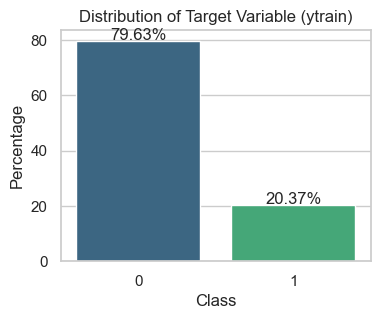

In [33]:
ytrain = pd.Series(ytrain)

# Calculate percentages
value_counts = ytrain.value_counts(normalize=True) * 100

# Plot the distribution with percentages
plt.figure(figsize=(4, 3))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
plt.title('Distribution of Target Variable (ytrain)')
plt.xlabel('Class')
plt.ylabel('Percentage')
for i, value in enumerate(value_counts.values):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center')
plt.show()

* In this step, I intend to compare different models performances. In order to achieve this, I will use stratified k-fold cross validation to train each one of them and evaluate their ROC-AUC score. Accuracy is not a good metric because the target is imbalanced. Moreover, stratified k-fold cross validation will maintain the target proportion on each fold, dealing with the imbalanced target as well.
* K-fold cross-validation is a technique used in machine learning to assess the performance of a model. It involves dividing the dataset into K subsets, using K-1 for training and one for testing iteratively. This helps in estimating a model's generalization ability by reducing the risk of overfitting and providing more reliable performance metrics.
* My objective here is to select a best model to go for feature selection, hyperparameter tuning and final model evaluation. In order to get this best model, I will evaluate the highest roc-auc average validation scores and look at the bias-variance trade-off.

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.5 - Chose best model</h3>
</div>

In [34]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)


In [35]:
model_rf.fit(X_train_final_df,ytrain)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [36]:
y_pred=model_rf.predict(X_test_final_df)

In [37]:
model_rf.score(X_test_final_df,ytest)

0.8371628371628371

In [38]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91       797
           1       0.77      0.28      0.42       204

    accuracy                           0.84      1001
   macro avg       0.81      0.63      0.66      1001
weighted avg       0.83      0.84      0.81      1001



In [39]:
import lightgbm as lgb
from sklearn.metrics import classification_report

# Train LightGBM model
lgb_train = lgb.Dataset(X_train_final_df, ytrain)
lgb_params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    
}
model_lgbm = lgb.train(lgb_params, lgb_train, valid_sets=None)

# Make predictions for LightGBM
y_pred_lgbm = model_lgbm.predict(X_test_final_df)

# Generate classification report for LightGBM
print(classification_report(ytest, y_pred_lgbm.round(), labels=[0, 1]))



[LightGBM] [Info] Number of positive: 1629, number of negative: 6370
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000507 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1626
[LightGBM] [Info] Number of data points in the train set: 7999, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203650 -> initscore=-1.363633
[LightGBM] [Info] Start training from score -1.363633
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       797
           1       0.70      0.42      0.53       204

    accuracy                           0.85      1001
   macro avg       0.78      0.69      0.72      1001
weighted avg       0.83      0.85      0.83      1001



In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train Logistic Regression model
model_lr = LogisticRegression()
model_lr.fit(X_train_final_df, ytrain)

# Make predictions for Logistic Regression
y_pred_lr = model_lr.predict(X_test_final_df)

# Generate classification report for Logistic Regression
print(classification_report(ytest, y_pred_lr, labels=[0, 1]))


              precision    recall  f1-score   support

           0       0.82      0.96      0.89       797
           1       0.57      0.18      0.28       204

    accuracy                           0.81      1001
   macro avg       0.70      0.57      0.58      1001
weighted avg       0.77      0.81      0.76      1001



* The results are great. I will go with LightGBM for feature selection specially it have best score on churn client
*  there are several steps i can take to further improve the performance of your models i will use 
-  Feature Selection
- SMOTENN because our data is imbalanced

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.6 - Optimisation of the model</h3>
</div>

i will apply SMOTE synthesizes samples in the minority class by linear interpolation to increase the number of samples in the minority class, while ENN reduces the number of samples in the majority class by removing noise samples from the majority class

X_val_final_df

In [41]:
from imblearn.combine import SMOTEENN
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Apply SMOTEENN
smote_enn = SMOTEENN()
X_resampled, y_resampled = smote_enn.fit_resample(X_test_final_df, ytest)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Model Training
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)

# Model Evaluation
y_pred = lgbm.predict(X_test)
print("Classification Report on Testing Data:")
print(classification_report(y_test, y_pred))


[LightGBM] [Info] Number of positive: 551, number of negative: 392
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2169
[LightGBM] [Info] Number of data points in the train set: 943, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.584305 -> initscore=0.340473
[LightGBM] [Info] Start training from score 0.340473
Classification Report on Testing Data:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       101
           1       0.95      0.97      0.96       135

    accuracy                           0.95       236
   macro avg       0.95      0.95      0.95       236
weighted avg       0.95      0.95      0.95       236



In [42]:
from joblib import dump, load


# Save the model to a file
dump(lgbm, "../model/lightgbm_model.joblib")

['../model/lightgbm_model.joblib']

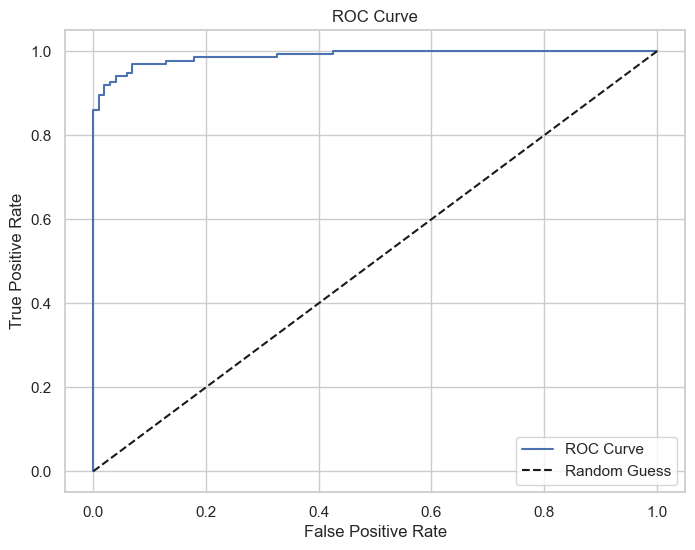

Confusion Matrix:
[[ 94   7]
 [  4 131]]


In [43]:
from sklearn.metrics import roc_curve, confusion_matrix
import matplotlib.pyplot as plt

# Predict probabilities for the test set
y_prob = lgbm.predict_proba(X_test)[:, 1]  # Use the original test set X_test

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculate confusion matrix
y_pred = lgbm.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


In [44]:
from sklearn.metrics import roc_auc_score

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_prob)

# Convert AUC score to percentage
auc_percentage = auc_score * 100

print("AUC Score:", auc_score)
print("AUC Percentage:", auc_percentage, "%")


AUC Score: 0.9885588558855886
AUC Percentage: 98.85588558855886 %


The model results are excellent!

* Recall (0.98): The model correctly identifies 98% of the churners. In practical terms, looking at the confusion matrix, it has accurately predicted 128 out of 131 attrited customers.
* Precision (0.92): Out of all customers predicted as churn, 92% of them are actually churners. In practical terms, considering the confusion matrix, out of 131 customers predicted as churn, 128 of them are indeed churners.
* ROC-AUC (0.98): With a ROC-AUC score of 0.98, the model demonstrates outstanding ability to differentiate between attrited and existing customers. In practive, if we randomly choose a customer that churned and a customer that dind't churn, in 98% of the time the model will estimate a higher probability of churn for that customer who actually attrited.
* Finally, once the train, test and validation scores are similar, the model's generalization ability is reliable.

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; "> Conclution

* In this project, I have built a LightGBM classifier for predicting customer's probability of churning in a bank's credit card service. The objective of the project was to build a model that was able to accurately predict the probability of a customer to churn
* The business problem is solved now. My model is able to correctly predict 95% of the churners, with an AUC of 0.98
* In order to deal with the imbalanced target the strategies used were, feature selection, SMOTEENN
* The next step is to deploy the model using pipeline like airflow then FastAPI to create an app.